In [21]:
# this function generates an item bank, in case the user cannot provide one
from catsim.cat import generate_item_bank
# simulation package contains the Simulator and all abstract classes
from catsim.simulation import *
# initialization package contains different initial proficiency estimation strategies
from catsim.initialization import *
# selection package contains different item selection strategies
from catsim.selection import *
# estimation package contains different proficiency estimation methods
from catsim.estimation import *
# stopping package contains different stopping criteria for the CAT
from catsim.stopping import *
import catsim.plot as catplot
import numpy as np
import random

### Running simulations

In [28]:
# generate an item bank
bank_size = 100
items = generate_item_bank(bank_size, '1PL')
examinees = 10

print('Starting simulation ...')
# simulate 10 examinees taking a CAT, given the generated item bank,
# a random proficiency initializer, maximum information item selector,
# hill climbing proficiency estimator and stopping criterion of 20 items
s = Simulator(items, examinees)
s.simulate(RandomInitializer(), MaxInfoSelector(), HillClimbingEstimator(), MaxItemStopper(20), verbose=True)

Starting simulation ...

Starting simulation: Random Initializer Maximum Information Selector Hill Climbing Estimator Maximum Item Number Initializer 100 items


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.40it/s]


Simulation took 1.5625884532928467 seconds


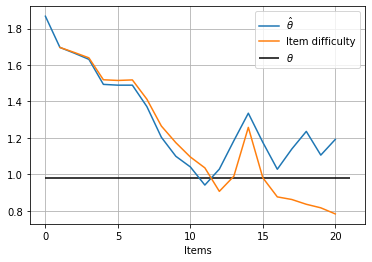

Bias: 0.005265431721930313
Mean squared error: 0.11004829440431174
Root mean squared error: 0.33173527759994376
Accessing examinee 4 results...
    True proficiency: 0.9780262077098943
    Items administered: [62, 56, 9, 99, 38, 31, 41, 47, 18, 35, 63, 55, 65, 97, 4, 85, 82, 87, 93, 68]
    Responses: [False, False, False, True, False, False, True, False, True, True, False, True, True, True, False, False, True, True, False, True]
    Proficiency estimation during each step of the test: [1.8671802587273723, 1.6962839511072594, 1.664622429865459, 1.6309767001201083, 1.4936999494192404, 1.4894252293540307, 1.4894252293540307, 1.3720447262816733, 1.203812374655573, 1.0995183614931667, 1.0413100617378956, 0.9419243454768809, 1.0292346450303624, 1.1848483069775642, 1.3356500824433892, 1.1760511623176384, 1.0285600509949626, 1.1394987428576777, 1.2360140192394973, 1.1060539557359823, 1.1921135746720932]


In [34]:
for i in range(4, 5):
    examinee_index = i

    catplot.test_progress(simulator=s,index=examinee_index, filepath = 'test-progress.jpeg')
    print('Bias:', s.bias)
    print('Mean squared error:', s.mse)
    print('Root mean squared error:', s.rmse)

    print('Accessing examinee', examinee_index, 'results...')
    print('    True proficiency:', s.examinees[examinee_index])
    print('    Items administered:', s.administered_items[examinee_index])
    print('    Responses:', s.response_vectors[examinee_index])
    print('    Proficiency estimation during each step of the test:', s.estimations[examinee_index])

### Import data bank

Generating item bank...



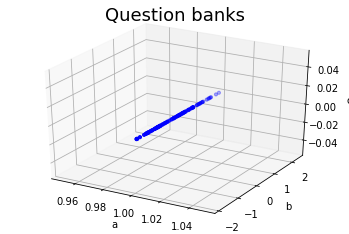

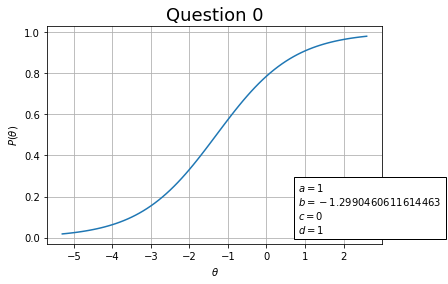

In [24]:
# generating an item bank
print('Generating item bank...')
bank_size = 100
items = generate_item_bank(bank_size, '1PL')

catplot.gen3d_dataset_scatter(items, 'Question banks', show = True)

catplot.item_curve(b = items[0][1], title = 'Question 0', filepath = 'Question.jpeg')

### Initialize

In [9]:
# creating dummy response patterns and selecting item indexes to pass as administered items
#print('Creating dummy examinee data...')
#responses = [random.choice([True, False])]
#administered_items = [random.randint(0, bank_size - 1)]
responses = []
administered_items = []

print('Creating simulation components...')
# create a random proficiency initializer
initializer = RandomInitializer()

# create a maximum information item selector
selector = MaxInfoSelector()

# create a hill climbing proficiency estimator
estimator = HillClimbingEstimator()

# create a stopping criterion that will make tests stop after 20 items
stopper = MaxItemStopper(20)

# manually initialize an examinee's proficiency as a float variable
est_theta = initializer.initialize()
thetas = [est_theta]
print('Examinee initial proficiency:', est_theta)

# get an estimated theta, given the answers to the dummy items
#new_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
#print('Estimated proficiency, given answered items:', new_theta)
#thetas.append(new_theta)

# get the index of the next item to be administered to the current examinee, given the answers they have already given to the previous dummy items
item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)
print('Next item to be administered:', item_index)

Creating simulation components...
Examinee initial proficiency: 4.2129634797517195


C:\Users\Administrator\Anaconda3\lib\site-packages\catsim\selection.py:86: UserWarning: This selector needs an item matrix with at least 5 columns, with the last one representing item exposure rate. Since this column is absent, it will presume all items have exposure rates = 0
  'This selector needs an item matrix with at least 5 columns, with the last one representing item exposure rate. Since this column is absent, it will presume all items have exposure rates = 0'


Next item to be administered: 33


In [10]:
def item_selection():
    # get the index of the next item to be administered to the current examinee, given the answers they have already given to the previous dummy items
    item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)
    print('Next item to be administered:', item_index)

    # get a boolean value pointing out whether the test should stop
    _stop = stopper.stop(administered_items=items[administered_items], theta=est_theta)
    print('Should the test be stopped:', _stop)
    
    return (_stop, item_index)

In [11]:
def item_administration():
    # get an new estimated theta
    new_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
    print('Estimated proficiency, given answered items:', new_theta)
    thetas.append(new_theta)

In [12]:
while True:
    administered_items.append(item_index)
    
    response = bool(int(input())) # Get user respone for current question
    responses.append(response)
    
    item_administration()
    
    (_stop, item_index) = item_selection() # Get next item
    
    if _stop:
        break

1
Estimated proficiency, given answered items: 1.6549855741468644
Next item to be administered: 32
Should the test be stopped: False
1
Estimated proficiency, given answered items: 1.6877777086978045
Next item to be administered: 6
Should the test be stopped: False
1
Estimated proficiency, given answered items: 1.7075152020671276
Next item to be administered: 30
Should the test be stopped: False
0
Estimated proficiency, given answered items: 1.7121912446406244
Next item to be administered: 16
Should the test be stopped: False
1
Estimated proficiency, given answered items: 1.7269093753941045
Next item to be administered: 31
Should the test be stopped: False
1
Estimated proficiency, given answered items: 1.7474071100755713
Next item to be administered: 45
Should the test be stopped: False
0
Estimated proficiency, given answered items: 1.7603689907891158
Next item to be administered: 49
Should the test be stopped: False
0
Estimated proficiency, given answered items: 1.7143675686913464
Next

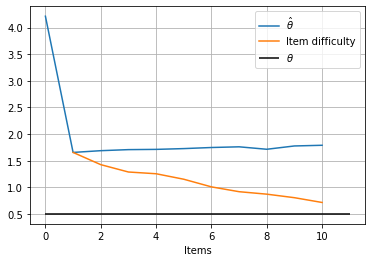

In [13]:
administered_items_matrix = []

for idx in administered_items:
    administered_items_matrix.append(items[idx])
    
administered_items_matrix = np.asarray(administered_items_matrix)

catplot.test_progress(thetas = thetas, administered_items = administered_items_matrix, true_theta = 0.5)